In [17]:
import tempun
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

let's load the GIST dataset

In [4]:
try:
    GIST = gpd.read_parquet("../../GI_ETL/data/large_data/GIST_v0-2.parquet")
except:
    GIST = gpd.read_parquet("https://zenodo.org/record/7185509/files/GIST_v0-2.parquet?download=1")

let's load the shipwrecks dataset...

In [5]:
# the file loaded below was first downloaded manually from: http://oxrep.classics.ox.ac.uk/databases/shipwrecks_database/ 
shipwrecks = pd.read_csv("../data/oxrep_shipwrecksdatabase20230725.csv", encoding="latin-1")
shipwrecks.head(100)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Croatia,Adriatic,Silba,Silba C,NaN,NaN,1,-150.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Croatia,Adriatic,Silba,Silba D,NaN,NaN,1,1000.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Croatia,Adriatic,Skolj od Volam,Skolj od Volam,-41.0,3.0,1,1.0,100.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
98,Croatia,Adriatic,Skoljic,Skoljic,NaN,NaN,1,50.0,150.0,Northern Italy,NaN,104.0,NaN,NaN,NaN,NaN


In [6]:
shipwrecks.shape

(1784, 16)

In [7]:
shipwrecks.columns

Index(['country', 'site_area', 'sitename', 'locname', 'localt', 'locheight',
       'recs', 'post_0', 'ante_0', 'fs_provenance', 'fs_destination',
       'fs_amph', 'fs_ma', 'fs_col', 'fs_blck', 'fs_sarc'],
      dtype='object')

In [9]:
shipwrecks["index_id"] = shipwrecks.index

In [10]:
shipwrecks["random_dates"] = shipwrecks.apply(lambda row: tempun.model_date(row["post_0"], row["ante_0"], size=100, seed=row["index_id"]), axis=1)

In [11]:
shipwrecks.head(10)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc,index_id,random_dates
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,0,"[-286, -282, -285, -286, -289, -284, -289, -27..."
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1,"[113, 158, 50, 95, 72, 64, 78, 102, 110, 131, ..."
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,2,"[-513, -595, -490, -513, -516, -534, -559, -47..."
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,3,"[-498, -492, -508, -500, -484, -484, -515, -51..."
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,"[497, 455, 497, 471, 470, 422, 498, 401, 425, ..."
5,Albany,Adriatic,Qefalit,Qefalit Tile wreck,0.0,0.0,1,-400.0,-300.0,Corinth,NaN,2.0,NaN,NaN,NaN,NaN,5,"[-378, -313, -379, -308, -351, -339, -323, -34..."
6,Albany,Adriatic,Rodon,Rodon,0.0,0.0,1,-525.0,-475.0,Corinth,NaN,1.0,NaN,NaN,NaN,NaN,6,"[-480, -508, -484, -523, -520, -495, -499, -50..."
7,Albany,Adriatic,Saranda,Saranda 1,-78.0,0.0,1,-600.0,-450.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7,"[-589, -483, -534, -491, -453, -519, -525, -58..."
8,Albany,Adriatic,Saranda,Saranda 2,0.0,0.0,1,-400.0,-300.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8,"[-313, -303, -313, -347, -377, -399, -357, -36..."
9,Albany,Adriatic,Saranda,Saranda 3,0.0,0.0,1,1.0,200.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9,"[3, 101, 100, 28, 29, 44, 84, 50, 18, 70, 34, ..."


(-850.0, 850.0)

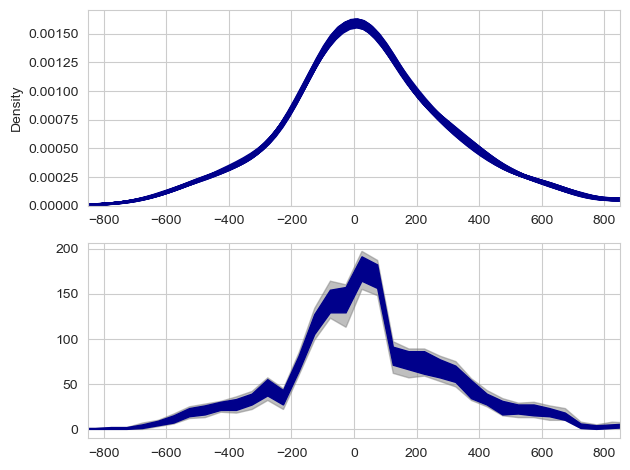

In [13]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True)
tempun.kdeplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax1)
ax1.set_xlim(-850,850)
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax2)
ax2.set_xlim(-850,850)

# Durations...

In [36]:
get_duration(101, 149)

49

In [16]:
def get_duration(start, stop):
    try:
        duration = abs(int(start) - int(stop)) + 1
        if 0 in range(int(start),  int(stop)):
            duration = duration - 1
    except:
        duration = np.nan
    return duration

GIST["duration"] = GIST.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)
shipwrecks["duration"] = shipwrecks.apply(lambda row: get_duration(row["post_0"], row["ante_0"]), axis=1)

Text(0.5, 1.0, '(B) GIST  (N=217863)')

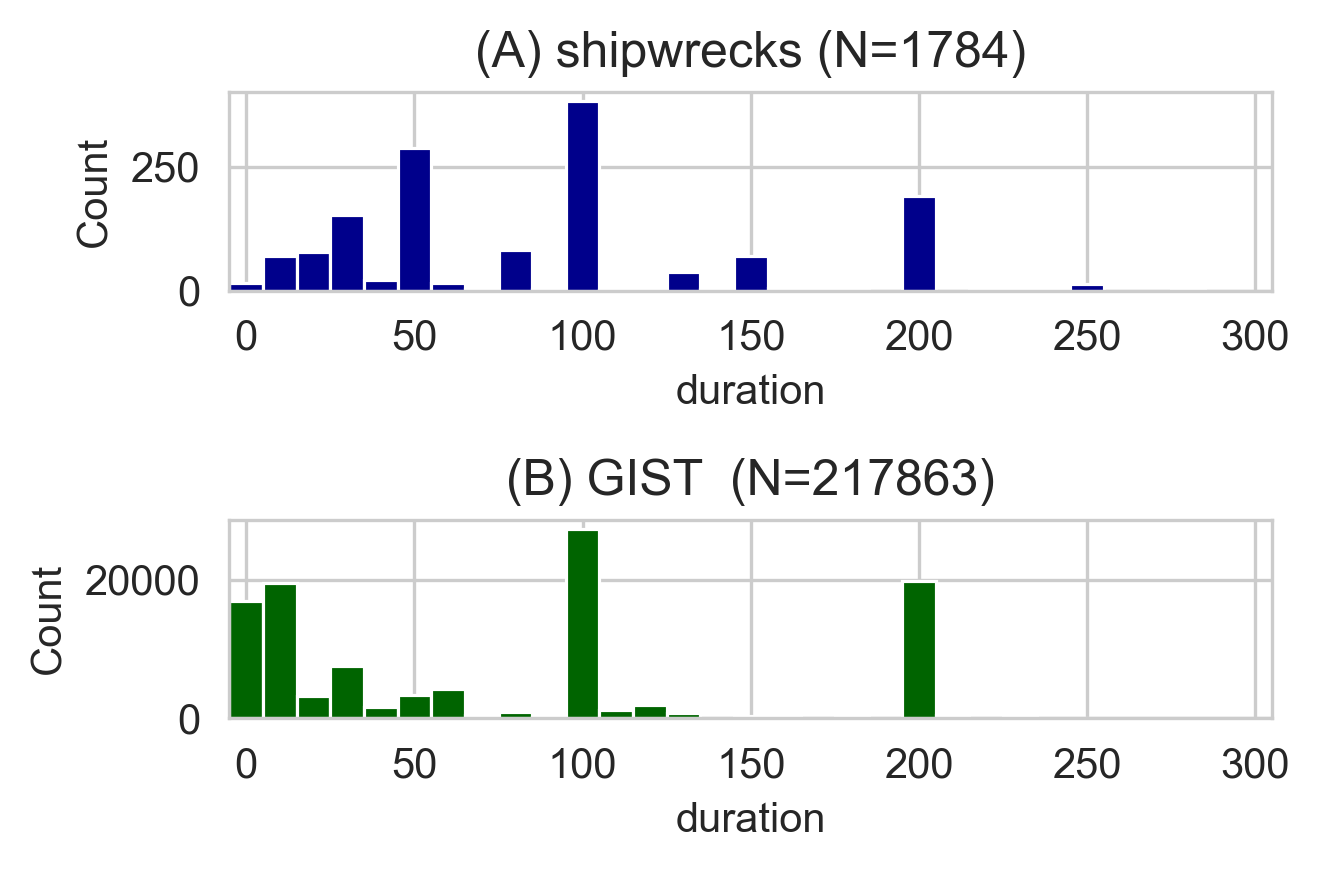

In [32]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(4.5,3), tight_layout=True, dpi=300)
sns.histplot(shipwrecks["duration"], kde=False, bins=range(-5, 305,10), alpha=1, color="darkblue", ax=ax1)
ax1.set_xlim(-5, 305)
ax1.set_title("(A) shipwrecks (N={0})".format(str(len(shipwrecks))))

sns.histplot(GIST["duration"], kde=False, bins=range(-5, 305,10), alpha=1, color="darkgreen", ax=ax2)
ax2.set_xlim(-5, 305)
ax2.set_title("(B) GIST  (N={0})".format(str(len(GIST))))


In [30]:
fig.savefig("../figures/durations.png")
fig.savefig("../figures/durations.tiff")

# Mid-range approach

In [42]:
def get_range(start, end):
    try:
        return int(np.mean([start, end]))
    except:
        return None
shipwrecks["midrange"] = shipwrecks.apply(lambda row: get_range(row["post_0"], row["ante_0"]), axis=1)
GIST["midrange"] = GIST.apply(lambda row: get_range(row["not_before"], row["not_after"]), axis=1)

<Axes: xlabel='midrange', ylabel='Count'>

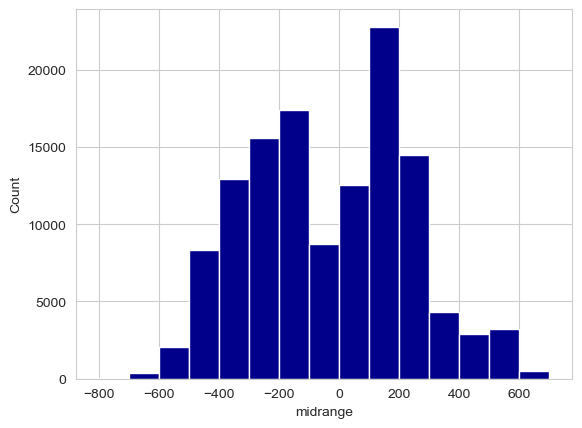

In [45]:
sns.histplot(GIST["midrange"], kde=False, bins=range(-800, 800,100 ), alpha=1, color="darkblue")